In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\prith\\Downloads\\cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

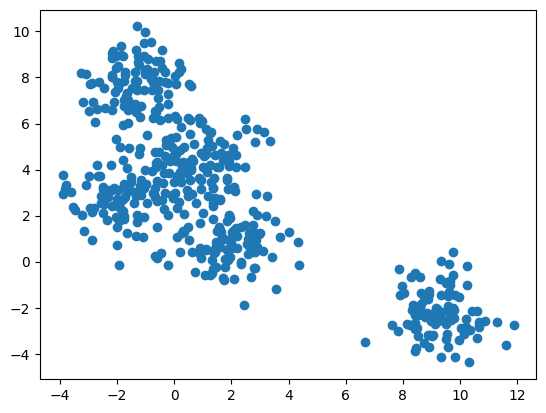

In [3]:
plt.scatter(X, Y)

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [25]:
def Distance(P1, P2):
    return np.sqrt((P2.x - P1.x) ** 2 + (P2.y - P1.y) ** 2)

def Mean(AP):
    x_sum = sum(point.x for point in AP)
    y_sum = sum(point.y for point in AP)
    n = len(AP)
    return Point(x_sum / n, y_sum / n)

In [26]:
def MinPoint(P, AP):
    min_distance = float('inf')
    min_point = None
    for point in AP:
        distance = Distance(P, point)
        if distance < min_distance:
            min_distance = distance
            min_point = point
    return min_point

In [27]:
def equality(A1, A2):
    if len(A1) != len(A2):
        return False
    for i in range(len(A1)):
        if int(A1[i].x) != int(A2[i].x) or int(A1[i].y) != int(A2[i].y):
            return False
    return True

In [28]:
def kMeans(X, Y, k):
    points = [Point(x, y) for x, y in zip(X, Y)]
    initial_centroids_indices = random.sample(range(len(points)), k)
    centroids = [points[i] for i in initial_centroids_indices]
    kMi = centroids[:]
    D = {centroid: [] for centroid in centroids}

    while True:
        for point in points:
            nearest_centroid = MinPoint(point, centroids)
            D[nearest_centroid].append(point)
        
        new_centroids = []
        for centroid, group in D.items():
            if group:
                new_centroid = Mean(group)
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(centroid)
        
        if equality(centroids, new_centroids):
            break
        
        centroids = new_centroids
        D = {centroid: [] for centroid in centroids}
    
    kM = centroids[:]
    return [kM, kMi, D]

In [29]:
def Elbow(X, Y):
    ssd = []
    K = range(1, 11)
    for k in K:
        _, _, D = kMeans(X, Y, k)
        ssd_k = sum(Distance(point, centroid) ** 2 for centroid in D for point in D[centroid])
        ssd.append(ssd_k)
    return ssd

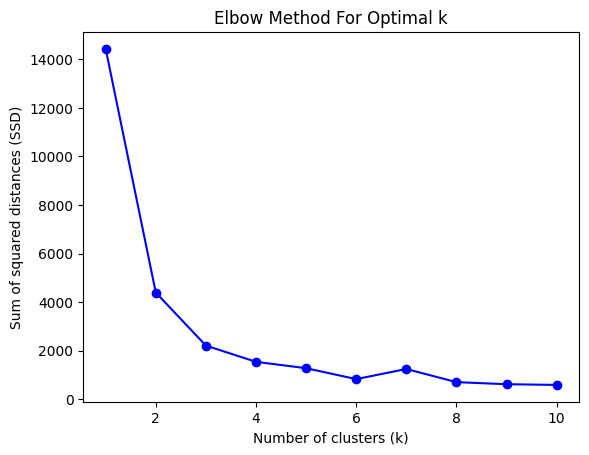

In [31]:
ssd_values = Elbow(X, Y)
K = range(1, 11)
plt.plot(K, ssd_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

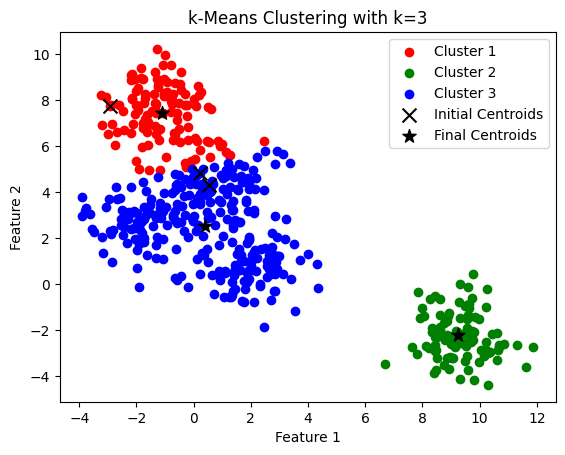

In [34]:
k = 3  
final_centroids, initial_centroids, D = kMeans(X, Y, k)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, (centroid, cluster_points) in enumerate(D.items()):
    cluster_color = colors[i % len(colors)]
    plt.scatter([p.x for p in cluster_points], [p.y for p in cluster_points], color=cluster_color, label=f'Cluster {i+1}')

plt.scatter([p.x for p in initial_centroids], [p.y for p in initial_centroids], color='k', marker='x', s=100, label='Initial Centroids')

plt.scatter([p.x for p in final_centroids], [p.y for p in final_centroids], color='k', marker='*', s=100, label='Final Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-Means Clustering with k={k}')
plt.legend()
plt.show()